In [1]:
import pandas as pd
import os
from pathlib import Path 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Работа над мини проектом 5-го урока

In [2]:
transaction_df = pd.read_csv('C:/Users/1233-/Downloads/transaction_data.csv')

In [3]:
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
transaction_df.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
transaction_df.shape

(5315, 3)

In [6]:
# сколько в датасете пропущенных значений?
transaction_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [7]:
# Проверьте, какие значения принимает колонка transaction . 
# Сколько наблюдений относятся к тому или иному уровню? 
# Визуализируйте результат с помощью барплота.

# Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

bar_df = transaction_df.transaction.value_counts().to_frame().reset_index()
bar_df

,index,transaction
0,successfull,3692
1,cancelled,1619
2,error,4


<AxesSubplot:xlabel='index', ylabel='transaction'>

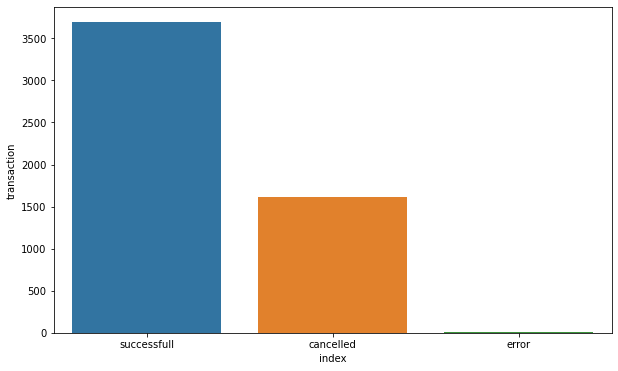

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='index', y='transaction', data=bar_df)

In [9]:
# Сколько транзакций осуществил каждый из пользователей? 
#Осуществлёнными считаются транзакции со значением successfull

tansaction_done = transaction_df.query('transaction == "successfull"') \
                .groupby('name', as_index=False) \
                .agg({'date': 'count'})

C:\Users\1233-\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date'>

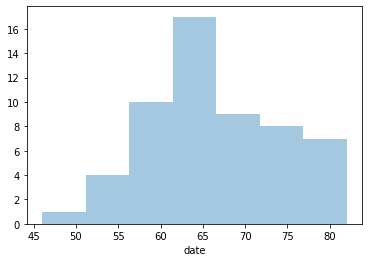

In [10]:
sns.distplot(tansaction_done.date, kde=False)

In [11]:
tansaction_done.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [12]:
#К вам пришёл коллега с немного обновленными данными. 
#Постройте сводную таблицу user_vs_minute_pivot
tansaction_update = pd.read_csv('C:/Users/1233-/Downloads/transaction_data_updated.csv')

In [13]:
tansaction_update['date'] = pd.to_datetime(tansaction_update.date)

In [14]:
tansaction_update.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [15]:
tansaction_update.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [16]:
user_vs_minute_pivot = tansaction_update \
                                .pivot_table(index='minute', columns='name', values='transaction', aggfunc='count') \
                                .fillna(0)

In [17]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [18]:
# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. 
# Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

tansaction_update = tansaction_update.assign(true_minute = tansaction_update.date.dt.hour * 60 + tansaction_update.minute)

In [19]:
tansaction_update.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [20]:
df_bar = tansaction_update.groupby('true_minute', as_index=False) \
                .agg({'transaction': 'count'})

<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

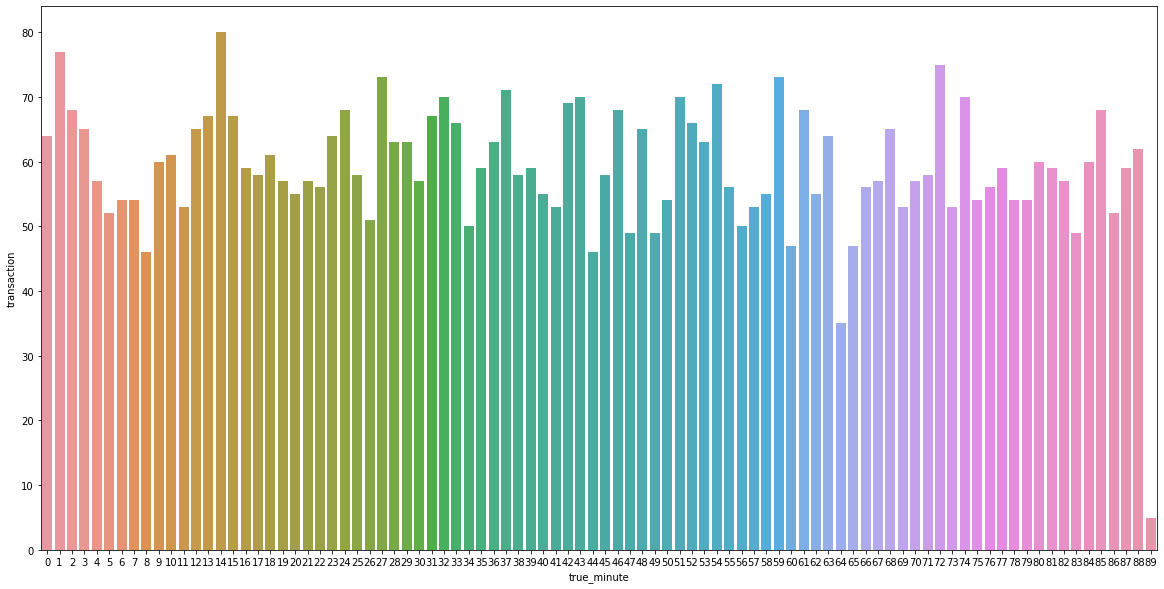

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x='true_minute', y='transaction', data=df_bar)

## Дополнительное задание 5-го урока

In [99]:
# Задание: собрать все данные в один датафрейм
# Убрать пустые значения в id
# Добавить приписку id там, где ее нет
# Смержить два датафрейма
# Посчитать разность времени и выбрать то, что больше 5 минут
# Импортировать в файл

In [100]:
# Считываем датафрейм для мержа
prod_df = pd.read_csv('C:/Users/1233-/Downloads/mini_proj/prod_activations_logs.csv', sep=';')

In [101]:
# Сохраняем путь к дириктории с файлами
path = r'C:\Users\1233-\Downloads\mini_proj'

In [102]:
# Создаем объект типа Path для дальнейшего прохождения по папкам
way_pah = Path(path)

In [103]:
# Пустой датафрейм для сохранения результатов
sales_df = pd.DataFrame()

In [104]:
# Цикл прохода и поиска всех необходимых файлов и их последующее чтение и запись
for i in way_pah.glob('**/tm*.csv'):
    
    df = pd.read_csv(i, sep=';')
    sales_df = pd.concat([sales_df,df])

In [105]:
# Сброс индекса
sales_df.reset_index(drop=True, inplace=True)

In [106]:
sales_df.shape

(10, 4)

In [107]:
# Удаление пустых значений по колонке SUBS_ID
sales_df.dropna(subset=['SUBS_ID'], inplace=True)

In [108]:
sales_df.shape

(9, 4)

In [111]:
# Функция для добавления символов к значению
def concat_1(name):
    if name.startswith('id'):
        return name
    return 'id' + name

In [114]:
# Обработка необходимых строк
sales_df['SUBS_ID'] = sales_df.SUBS_ID.apply(concat_1)

In [115]:
# Мерж двух датафрейма по нужным колонкам
df_merg = sales_df.merge(prod_df, on=['SUBS_ID', 'PROD_ID'])

In [118]:
# Парсим дату в нужном формате 
# %d- день
# %m- месяц 
# %Y- год формата 2020 
# %H- часы 24 часовой формат
# %M- минуты
df_merg['START_DTTM'] = pd.to_datetime(df_merg.START_DTTM, format='%d-%m-%Y %H:%M')
df_merg['END_DTTM'] = pd.to_datetime(df_merg.END_DTTM, format='%d-%m-%Y %H:%M')

In [119]:
# Еще один способ форматирования даты(где в аргумент apply после функции мы передаем аргумент используемой функции)
df_merg[['START_DTTM', 'END_DTTM']] = df_merg[['START_DTTM', 'END_DTTM']] \
                                                .apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M'))

In [121]:
# Еще один вариант без lambda функции
df_merg[['START_DTTM', 'END_DTTM']] = df_merg[['START_DTTM', 'END_DTTM']] \
                                                .apply(pd.to_datetime, format='%d-%m-%Y %H:%M')

In [122]:
# Находим разность по времени, из конца вычитаем начало
df_merg['difference'] = df_merg.END_DTTM - df_merg.START_DTTM

In [123]:
# Отбираем строки, в которых разность больше 5 минут(получаем bool серию)
pred = df_merg.difference > "5m"

In [125]:
# Передаем в параметр loc нашу серию, где метод посчитает нужные строки отмеченные True
df_merg.loc[pred]

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,difference
0,id4651830,1,1954,20-03-2020 14:59,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
2,id5416547,3,1743,17-03-2020 10:17,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
3,id2185490,2,3210,16-03-2020 16:28,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
4,id7642700,6,3020,15-03-2020 14:21,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [126]:
# Отбриаем нужные строки и сохраняем в файл без индекса и с нужным разделителем
df_merg[['ACT_DTTM', 'FILIAL_ID', 'difference']].to_csv('tmp_date.csv', sep=';', index=False)

In [128]:
# Отбор нужных id
df_merg.SUBS_ID.sort_values().str.cat(sep=', ')

'id2185490, id4651830, id5416547, id7642700, id7646509'